# EEG preprocessing

## Import packages and define variables

### Use 'matplotlib qt' to process your data, as pop up windows allow you to see full time span of data and you could interact with figures. Using 'matplotlib notebook' here is just to show the figures for demonstraction purpose. 

In [7]:
%matplotlib notebook
# %matplotlib qt

In [1]:
import pdb
import matplotlib.pyplot as plt
import numpy as np
import mne
from utils.analyzer import Analyzer
from utils.data_loader import DataLoader
from utils.preprocessing import Preprocessing

In [9]:
Ref = "origin"
exp_counter = 1 # defined in data_loader
low_freq = 0.05
hi_freq = 5

## import data

1. Load raw data from raw_eeg.csv and convert it to .fif file for mne package. 
2. Load event number from event.csv and add them to raw data.
3. Add EMG event from EMG_onsets.csv found out by preprocessing_EMG.ipynb. (Optional)

In [10]:
data_loader = DataLoader(exp_counter=exp_counter)
data_loader.init_task_dependent_variables()
data_loader.load_data()
data_loader.create_raw_object()
data_loader.create_event()
data_loader.add_EMG_event()
print(
    "-----------------------------------------------------------------------------------------------------------"
    "\n{}\n------------------------------------------------------------------------------------------------------"
        .format(data_loader.exp_name))

Creating RawArray with float64 data, n_channels=31, n_times=2611304
    Range : 0 ... 2611303 =      0.000 ...  5222.606 secs
Ready.
-----------------------------------------------------------------------------------------------------------
sub1
------------------------------------------------------------------------------------------------------


## preprocessing

In [11]:
preprocessing = Preprocessing(data_loader)

### 1. Apply bandpass filter to get interested MRCP component. 
Note: In qt mode, you could scan through the whole data and reject bad spans using labels showed up in the second window.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 5 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 0.05, 5.00 Hz: -6.02, -6.02 dB



<IPython.core.display.Javascript object>


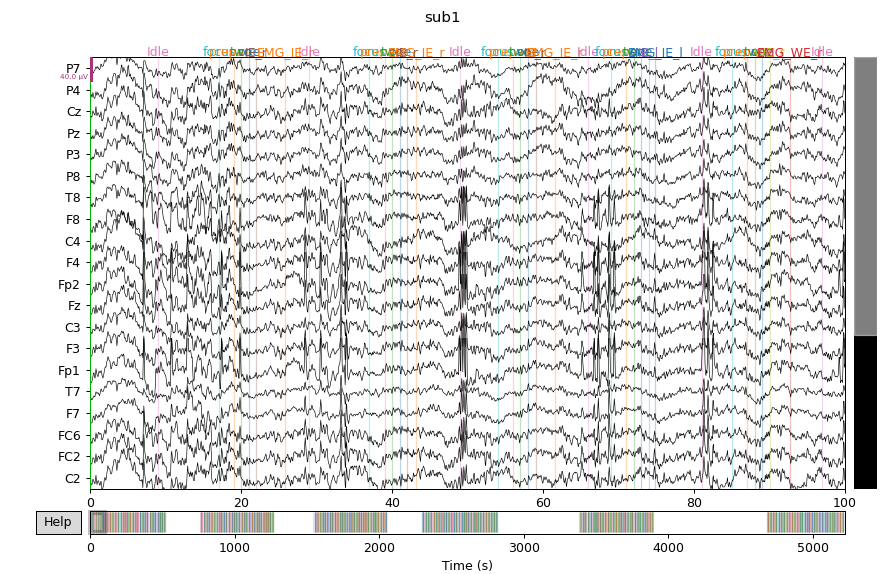

<IPython.core.display.Javascript object>


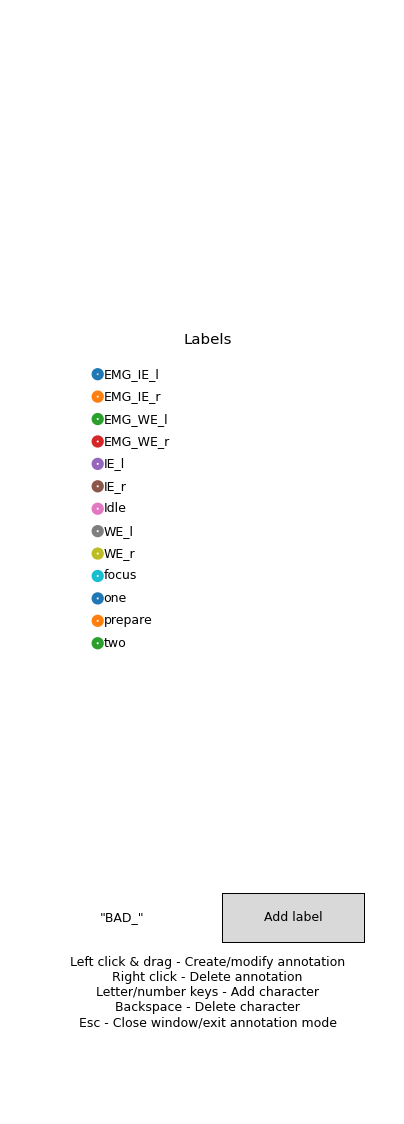

select bad span of signal..., press c to continue


In [12]:
preprocessing.apply_filter(hi=hi_freq, low=low_freq, order=2, duration = 100)


### 2. CAR (optional) 
Apply common average reference (CAR), first plot is before CAR, second plot is after CAR. This step is optional.

<IPython.core.display.Javascript object>


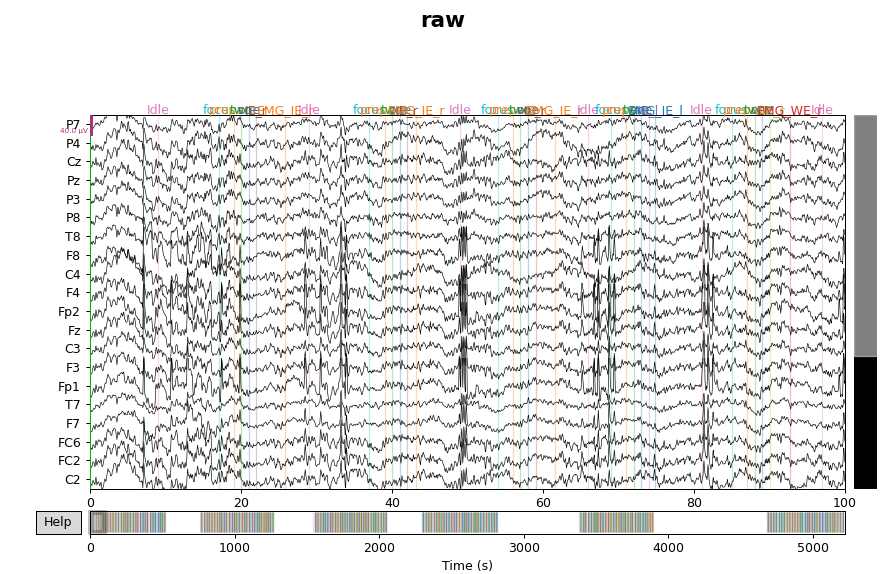

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


<IPython.core.display.Javascript object>


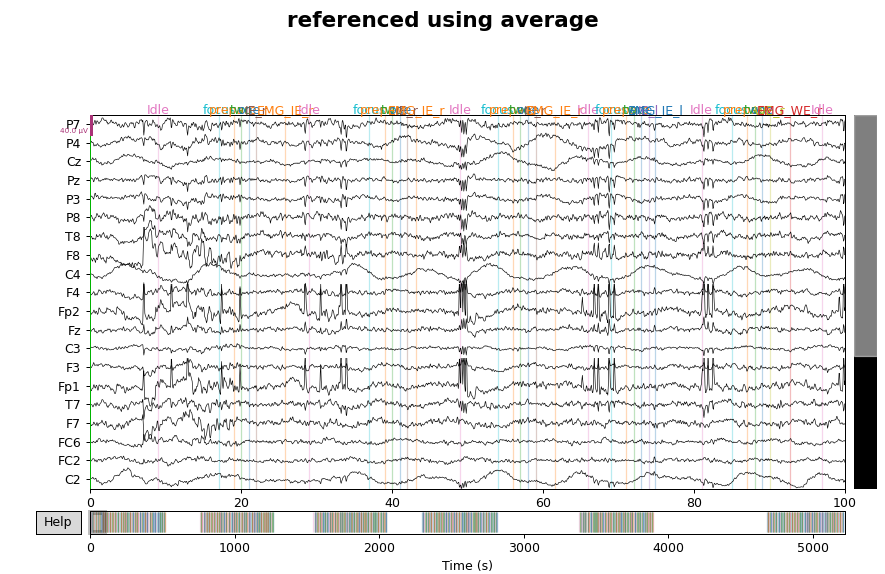

In [13]:
preprocessing.apply_referencing(reference_channel="average", duration=100, change_raw=False) # change_raw = Ture to keep change

### 3. Use ICA to remove eye blinks

In qt mode, two independent souces figure will pop up. You could click the EOG IC in the first plot to mark it as red, 
which will be removed from source space later. In the following situation, I will remove IC001, IC003

Fitting ICA to data using 27 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 27 components
Fitting ICA took 108.1s.


<IPython.core.display.Javascript object>


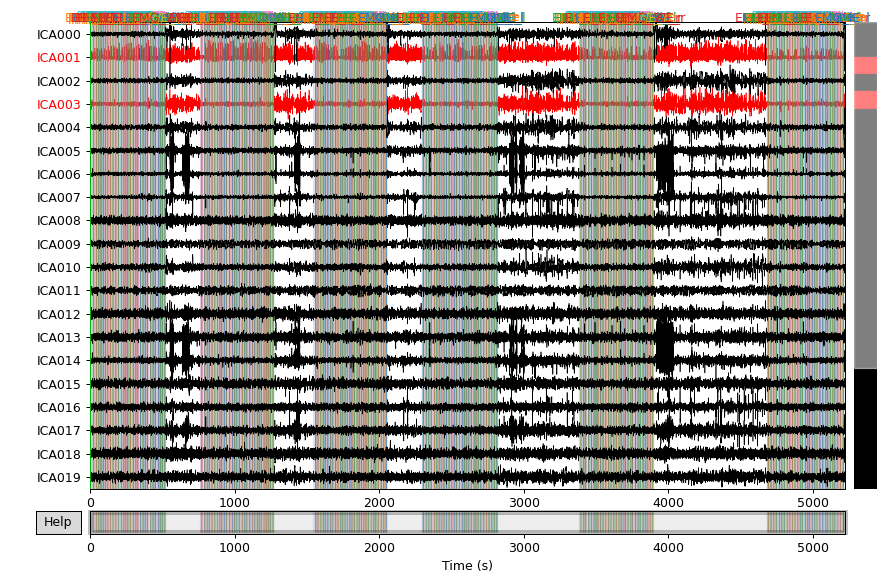

<IPython.core.display.Javascript object>


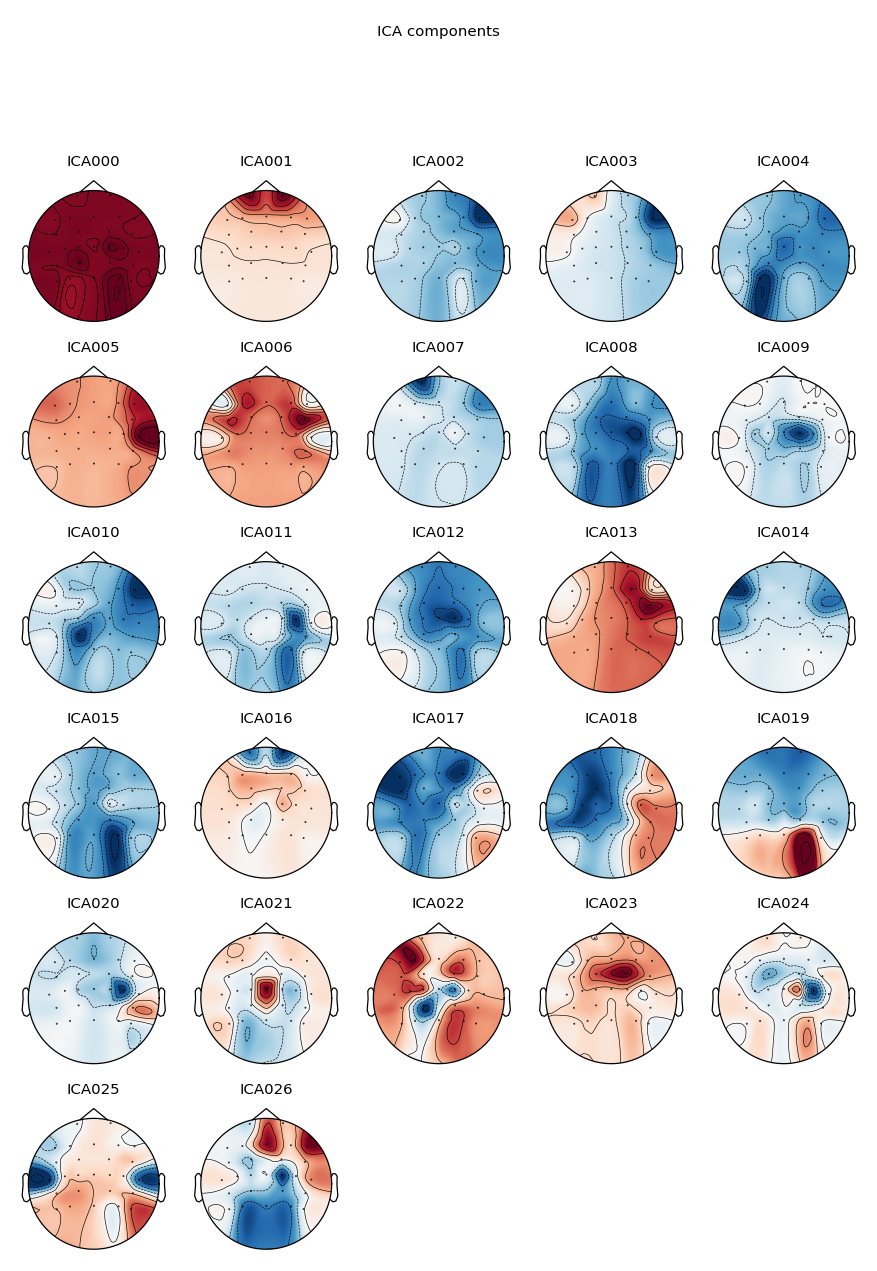

In [14]:
preprocessing.apply_ICA()





### 4. Project back to sensor space.

Remove chosen ICs from source space and project the rest back to sensor space. The first plot shows before ICA, second plot shows after ICA. If you has chosen IC001 and IC003 in the previous step, you should see eye blinks been removed.

<IPython.core.display.Javascript object>


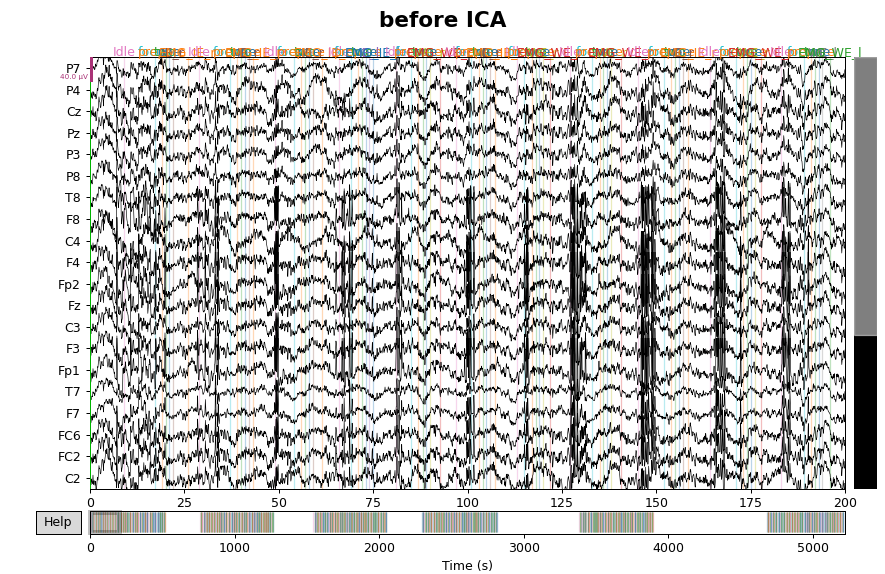

Transforming to ICA space (27 components)
Zeroing out 2 ICA components


<IPython.core.display.Javascript object>


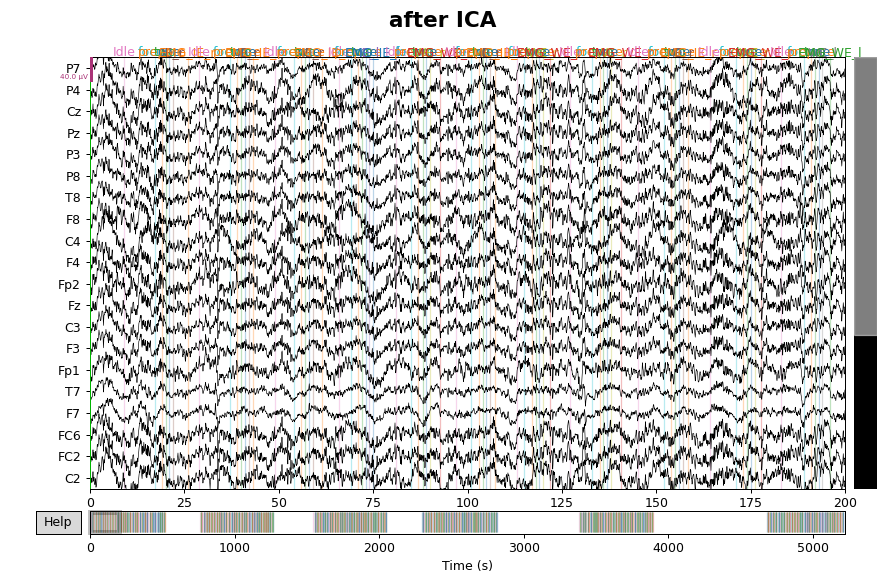

Transforming to ICA space (27 components)
Zeroing out 2 ICA components


<IPython.core.display.Javascript object>


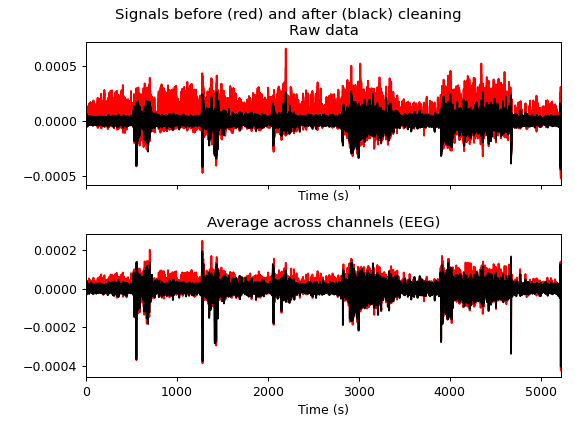

In [15]:
preprocessing.exclude_ICA()

## Save processed data to <processed_data\ consecutive_data> folder

In [16]:
preprocessing.save_consecutive_data(special_name='referenced_using_{}'.format(Ref))

D:\OneDrive - University of Waterloo\Jiansheng\MRCP_folder\MRCP_online_interface\Processing_package_for_Stevie\offline_processing_slim\preprocessing.py:105: RuntimeWarning: This filename (D:\OneDrive - University of Waterloo\Jiansheng\MRCP_folder\MRCP_online_interface\Processing_package_for_Stevie\processed_data\consecutive_data\sub1_processed_BPF_0.05Hz_5Hz_referenced_using_origin.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  self.hi, special_name), overwrite=True)


Overwriting existing file.
Writing D:\OneDrive - University of Waterloo\Jiansheng\MRCP_folder\MRCP_online_interface\Processing_package_for_Stevie\processed_data\consecutive_data\sub1_processed_BPF_0.05Hz_5Hz_referenced_using_origin.fif
Closing D:\OneDrive - University of Waterloo\Jiansheng\MRCP_folder\MRCP_online_interface\Processing_package_for_Stevie\processed_data\consecutive_data\sub1_processed_BPF_0.05Hz_5Hz_referenced_using_origin.fif [done]
